In [1]:
import pandas as pd
import os
import time
from body_measurement import BodyMeasurement
import json

In [2]:
def create_measurements_df(image_folder_path, metadata_folder_path):
    """
    Creates a pandas DataFrame from measurement text files with corresponding image files.
    
    Parameters:
    image_folder_path: str - Path to folder containing image files
    metadata_folder_path: str - Path to folder containing measurement text files
    
    Returns:
    pandas DataFrame with measurements data
    """
    # List to store all measurements
    all_measurements = []
    
    # Get all files in the metadata folder
    try:
        txt_files = [f for f in os.listdir(metadata_folder_path) if f.endswith('.txt')]
    except Exception as e:
        print(f"Error reading directory: {e}")
        return pd.DataFrame()

    for txt_file in txt_files:
        file_path = txt_file
        # Get the base filename without extension
        object_name = os.path.splitext(txt_file)[0]
        
        # Initialize measurements dictionary
        measurements_dict = {"file_name": object_name, "file_path": file_path}
        
        try:
            with open(os.path.join(metadata_folder_path, txt_file), 'r') as f:
                for line in f:
                    line = line.strip()
                    if not line:  # Skip empty lines
                        continue
                        
                    try:
                        if line.startswith("OPTION"):
                            # Handle the OPTION UNITS line
                            parts = line.split('=')
                            if len(parts) == 2:
                                measurements_dict["OPTION_UNITS"] = parts[1].strip()
                        elif line.startswith("MEASURE"):
                            # Split the measurement line into name and value
                            parts = line.split('=')
                            if len(parts) == 2:
                                measurement_name = parts[0].replace('MEASURE ', '').strip()
                                measurement_value = parts[1].strip()
                                
                                # Check if the value contains error message
                                if "Error" not in measurement_value:
                                    try:
                                        measurements_dict[measurement_name] = float(measurement_value)
                                    except ValueError:
                                        # If conversion fails, store as None
                                        measurements_dict[measurement_name] = None
                                else:
                                    measurements_dict[measurement_name] = None
                    except Exception as e:
                        print(f"Error processing line in file {txt_file}: {line}")
                        continue
            
            # Check if corresponding image file exists
            image_exists = any(
                os.path.exists(os.path.join(image_folder_path, f"{object_name}.{ext}"))
                for ext in ['jpg', 'jpeg', 'png', 'bmp']
            )
            
            if image_exists:
                all_measurements.append(measurements_dict)
                
        except Exception as e:
            print(f"Error processing file {txt_file}: {e}")
            continue

    if not all_measurements:
        print("No valid measurements found")
        return pd.DataFrame()

    # Create DataFrame
    df = pd.DataFrame(all_measurements)
    
    # Reorder columns to put file_name and OPTION_UNITS first
    cols = ['file_name', 'OPTION_UNITS'] + [col for col in df.columns if col not in ['file_name', 'OPTION_UNITS']]
    df = df[cols]
    
    return df

In [3]:
image_folder = "/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male"
metadata_folder = "/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/TC2_Male_Txt"
output_dir = f"./testing/iter_testing/iter_{str(int(time.time()))}/"

In [4]:
df = create_measurements_df(image_folder, metadata_folder)
df = df[["file_name", "file_path", "Shoulder_Width_thruTheBody", "Head_Top_Height"]]
df.columns = ["file_name", "file_path", "shoulder_width", "total_height"]

In [16]:
df = df.loc[132:]

In [17]:
ans = dict()

for _, row in df.iterrows():
    try:
        tmp = BodyMeasurement(
            image_path=f"{image_folder}/{row['file_name']}.png",
            height_cm=row["total_height"],
            is_silhouette=True
        ).execute()
        result = {
                "real_measurements": tmp,
                "original_measurements": {
                    "shoulder_width": row["shoulder_width"],
                    "total_height": row["total_height"]
                }
            }
        
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{row['file_name']}.json")
        with open(output_path, 'w') as f:
            json.dump(result, f, indent=4)
        ans[row["file_name"]] = result
    except:
        pass

I0000 00:00:1733741336.536801 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733741336.763361 8526178 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741336.879189 8526176 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741337.094153 8526177 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1733741337.121400 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2



Body Measurements:
Shoulder Width: 42.4 cm
Torso Height: 70.8 cm
Chest Width: 38.1 cm


W0000 00:00:1733741337.314603 8526258 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741337.460805 8526259 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.7 cm
Torso Height: 69.5 cm
Chest Width: 35.8 cm


I0000 00:00:1733741337.792843 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741337.986831 8526273 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741338.111314 8526273 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 45.4 cm
Torso Height: 68.8 cm
Chest Width: 40.8 cm


I0000 00:00:1733741338.336260 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741338.541608 8526282 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741338.659134 8526286 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.4 cm
Torso Height: 73.8 cm
Chest Width: 37.2 cm


I0000 00:00:1733741338.865985 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741339.051447 8526294 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741339.175301 8526296 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.2 cm
Torso Height: 73.8 cm
Chest Width: 36.1 cm


I0000 00:00:1733741339.936011 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741340.101494 8526333 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741340.229439 8526335 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.1 cm
Torso Height: 77.2 cm
Chest Width: 37.0 cm


I0000 00:00:1733741340.439662 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741340.640844 8526346 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741340.765064 8526346 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.6 cm
Torso Height: 68.8 cm
Chest Width: 36.6 cm


I0000 00:00:1733741341.072529 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741341.242709 8526359 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741341.379561 8526360 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.5 cm
Torso Height: 69.0 cm
Chest Width: 37.3 cm


I0000 00:00:1733741341.616618 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741342.098072 8526375 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741342.770975 8526375 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733741342.867860 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741343.383315 8526397 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741343.692412 8526397 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 38.1 cm
Torso Height: 69.5 cm
Chest Width: 34.3 cm


I0000 00:00:1733741344.252632 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741344.934457 8526421 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741345.706112 8526421 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.6 cm
Torso Height: 73.2 cm
Chest Width: 36.5 cm


I0000 00:00:1733741346.295077 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741346.736392 8526504 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741347.196150 8526503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.6 cm
Torso Height: 71.6 cm
Chest Width: 36.6 cm


I0000 00:00:1733741347.941673 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741348.395526 8526652 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741349.210095 8526652 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.7 cm
Torso Height: 73.4 cm
Chest Width: 37.5 cm


I0000 00:00:1733741349.769261 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741350.116551 8526707 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741350.416563 8526711 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733741350.446862 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741350.825311 8526734 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741351.100292 8526734 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 45.0 cm
Torso Height: 78.3 cm
Chest Width: 40.5 cm


I0000 00:00:1733741351.873730 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741352.373651 8526764 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741352.708453 8526764 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 60.4 cm
Torso Height: 64.1 cm
Chest Width: 54.3 cm


I0000 00:00:1733741353.233296 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741353.589257 8526790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741353.817345 8526790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.6 cm
Torso Height: 74.7 cm
Chest Width: 37.5 cm


I0000 00:00:1733741354.308396 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741354.628098 8526801 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741354.942298 8526801 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.2 cm
Torso Height: 74.0 cm
Chest Width: 37.0 cm


I0000 00:00:1733741355.777631 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741356.169071 8526825 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741356.449234 8526828 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 43.1 cm
Torso Height: 75.9 cm
Chest Width: 38.8 cm


I0000 00:00:1733741356.886095 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741357.276685 8526841 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741357.528195 8526838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.0 cm
Torso Height: 69.3 cm
Chest Width: 35.1 cm


I0000 00:00:1733741358.009221 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741358.355583 8526851 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741358.673621 8526852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.8 cm
Torso Height: 73.9 cm
Chest Width: 36.7 cm


I0000 00:00:1733741359.331168 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741359.675292 8526877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741359.982720 8526874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 43.5 cm
Torso Height: 74.0 cm
Chest Width: 39.2 cm


I0000 00:00:1733741360.615527 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741360.996659 8526909 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741361.337729 8526911 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 42.3 cm
Torso Height: 75.1 cm
Chest Width: 38.1 cm


I0000 00:00:1733741361.706063 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741362.065696 8526933 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741362.567662 8526936 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 32.9 cm
Torso Height: 76.3 cm
Chest Width: 29.6 cm


I0000 00:00:1733741363.058700 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741363.416090 8526951 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741363.860698 8526951 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.4 cm
Torso Height: 75.0 cm
Chest Width: 37.3 cm


I0000 00:00:1733741364.304164 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741364.673995 8526976 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741364.912899 8526983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 42.8 cm
Torso Height: 77.2 cm
Chest Width: 38.5 cm


I0000 00:00:1733741365.538785 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741365.992831 8526989 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741366.252029 8526989 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 42.8 cm
Torso Height: 72.9 cm
Chest Width: 38.5 cm


I0000 00:00:1733741366.717072 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741367.034801 8527002 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741367.351619 8527002 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733741367.486553 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741367.850353 8527015 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741368.021332 8527018 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.8 cm
Torso Height: 73.7 cm
Chest Width: 35.8 cm


I0000 00:00:1733741368.605653 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741368.885813 8527025 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741369.072051 8527025 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 42.5 cm
Torso Height: 72.6 cm
Chest Width: 38.2 cm


I0000 00:00:1733741369.531200 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741369.946774 8527034 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741370.254265 8527034 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.2 cm
Torso Height: 68.2 cm
Chest Width: 37.1 cm


I0000 00:00:1733741370.590347 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741370.872797 8527050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741371.027386 8527050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 33.2 cm
Torso Height: 59.5 cm
Chest Width: 29.9 cm


I0000 00:00:1733741371.637307 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741371.994143 8527058 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741372.210313 8527062 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.4 cm
Torso Height: 65.8 cm
Chest Width: 35.4 cm


Context leak detected, msgtracer returned -1
I0000 00:00:1733741372.709326 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741373.083334 8527076 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741373.258639 8527079 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.8 cm
Torso Height: 70.6 cm
Chest Width: 35.8 cm


I0000 00:00:1733741373.626324 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741373.973651 8527091 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741374.378827 8527094 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.0 cm
Torso Height: 66.9 cm
Chest Width: 36.0 cm


I0000 00:00:1733741374.854563 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741375.158110 8527109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741375.391727 8527109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 40.3 cm
Torso Height: 73.4 cm
Chest Width: 36.3 cm


I0000 00:00:1733741375.838977 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741376.368607 8527127 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741376.648734 8527130 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.2 cm
Torso Height: 69.2 cm
Chest Width: 37.1 cm


I0000 00:00:1733741377.171319 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741377.488121 8527203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741377.762260 8527204 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 55.0 cm
Torso Height: 79.3 cm
Chest Width: 49.5 cm


I0000 00:00:1733741378.283971 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741378.685416 8527251 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741378.888741 8527248 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 38.3 cm
Torso Height: 71.9 cm
Chest Width: 34.5 cm


I0000 00:00:1733741379.621255 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741380.067333 8527302 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741380.445847 8527302 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733741380.928121 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741381.423657 8527334 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741382.132129 8527334 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.0 cm
Torso Height: 70.6 cm
Chest Width: 35.1 cm


I0000 00:00:1733741382.948140 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741383.591797 8527401 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741383.961178 8527408 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 42.3 cm
Torso Height: 73.1 cm
Chest Width: 38.0 cm


I0000 00:00:1733741384.707710 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741385.252221 8527440 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741385.743445 8527442 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733741385.847739 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741386.411463 8527468 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741386.705584 8527473 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 39.9 cm
Torso Height: 70.9 cm
Chest Width: 35.9 cm


I0000 00:00:1733741387.239423 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741387.565418 8527484 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741387.816526 8527488 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 41.5 cm
Torso Height: 79.5 cm
Chest Width: 37.3 cm


I0000 00:00:1733741388.304053 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741388.659829 8527497 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741388.862440 8527499 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



Body Measurements:
Shoulder Width: 37.0 cm
Torso Height: 69.1 cm
Chest Width: 33.3 cm


I0000 00:00:1733741389.371180 8524002 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733741389.901200 8527512 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733741390.198472 8527512 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [1]:
import os
import json
import numpy as np

data_dir = "./testing/iter_testing/iter_1733740898/"
ans = {}

for filename in os.listdir(data_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as f:
            ans[filename.replace('.json', '')] = json.load(f)

['male_0073', 'male_0161', 'male_0024', 'male_0177', 'male_0120', 'male_0065', 'male_0049', 'male_0008', 'male_0090', 'male_0086', 'male_0069', 'male_0012', 'male_0157', 'male_0045', 'male_0100', 'male_0053', 'male_0116', 'male_0141', 'male_0005', 'male_0140', 'male_0052', 'male_0117', 'male_0044', 'male_0101', 'male_0013', 'male_0156', 'male_0087', 'male_0068', 'male_0029', 'male_0091', 'male_0009', 'male_0048', 'male_0121', 'male_0064', 'male_0176', 'male_0033', 'male_0025', 'male_0137', 'male_0072', 'male_0096', 'male_0079', 'male_0038', 'male_0080', 'male_0014', 'male_0151', 'male_0043', 'male_0106', 'male_0055', 'male_0110', 'male_0002', 'male_0147', 'male_0130', 'male_0075', 'male_0167', 'male_0171', 'male_0034', 'male_0063', 'male_0018', 'male_0058', 'male_0019', 'male_0127', 'male_0062', 'male_0170', 'male_0035', 'male_0166', 'male_0023', 'male_0131', 'male_0074', 'male_0003', 'male_0146', 'male_0054', 'male_0111', 'male_0042', 'male_0107', 'male_0150', 'male_0081', 'male_0039'

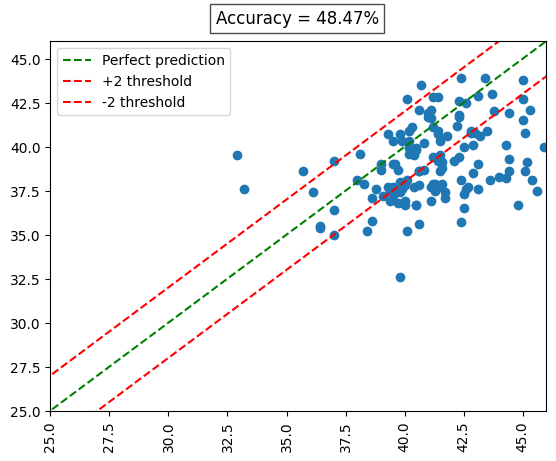

Accuracy = 48.466257668711656%


In [2]:
import matplotlib.pyplot as plt

treshold = 2.5

photo_ids = []
for photo_id, val in ans.items():
    if ("shoulder_width" in ans[photo_id]["real_measurements"]):
        photo_ids.append(photo_id)
predict_vals = [ans[photo_id]["real_measurements"]["shoulder_width"] for photo_id in photo_ids]
actual_val = [ans[photo_id]["original_measurements"]["shoulder_width"] for photo_id in photo_ids]

print(photo_ids)

good = 0
for a,b in zip(predict_vals, actual_val):
    c = abs(a - b)
    if (c <= treshold and c >= -treshold):
        good += 1
accuracy = good / len(photo_ids)

plt.scatter(predict_vals, actual_val)
line_range = np.linspace(20, 50, 100)
plt.plot(line_range, line_range, '--', color='green', label='Perfect prediction')
plt.plot(line_range, line_range + 2, '--', color='red', label='+2 threshold')
plt.plot(line_range, line_range - 2, '--', color='red', label='-2 threshold')
plt.xlim(25, 46)
plt.ylim(25, 46)
plt.text(32, 47, f'Accuracy = {round(accuracy*100, 2)}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.xticks(rotation=90)
plt.legend()
plt.show()


print(f"Accuracy = {accuracy * 100}%")

In [4]:
import sys
sys.path.append('..')
from utils import r2_threshold, mae_threshold, rmse_threshold

In [5]:
r2_threshold(np.array(predict_vals), np.array(actual_val))

(-0.05318997854158036, 48.466257668711656)

In [6]:
rmse_threshold(np.array(predict_vals), np.array(actual_val))

(9.088913222067982, 48.466257668711656)

In [7]:
mae_threshold(np.array(predict_vals), np.array(actual_val))

(4.985276073619631, 48.466257668711656)